In [1]:
!pip install git+https://github.com/SergeiSah/Product_classification.git

  Cloning https://github.com/SergeiSah/Product_classification.git to /tmp/pip-req-build-4r6dlu4v
  Running command git clone --filter=blob:none --quiet https://github.com/SergeiSah/Product_classification.git /tmp/pip-req-build-4r6dlu4v
  Resolved https://github.com/SergeiSah/Product_classification.git to commit 64526ca0a182232e127d7ea74b182e7bfc05131c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 89.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for product-classificator: filename=product_classificator-0.0.5-py2.py3-none-any.whl size=20534197 sha256=7fdf785cae62948b584f3fc6096831b4193ce3a86d6aa5ad96ad7285cc764583
  Stored in directory: /tmp/pip

In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=<YOUR_ACCESS_KEY>
%env CLEARML_API_SECRET_KEY=<YOUR_SECRET_KEY>

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=IYTXNWREN0UVZ0J9BW3H
env: CLEARML_API_SECRET_KEY=E1RtW3y8NJt1WE1itmcBN8ndR9YRMhEWuDnptUdYWyhgMraYlh


In [13]:
from pprint import pprint
from product_classificator.training import Trainer
from clearml import Task

In [4]:
task = Task.init(project_name="WBTECH: Horizontal ML", 
                 task_name="ruCLIP training",
                 auto_connect_frameworks={'matplotlib': False})

ClearML Task: created new task id=1bc1beb04c6443f49d9e8517e26cf81f
2024-05-23 05:16:52,272 - clearml.Repository Detection - WARNING - Jupyter Notebook auto-logging failed, could not access: /kaggle/working/__notebook_source__.ipynb
2024-05-23 05:16:52,278 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/44072f7524d8442db27d39c38109a8c5/experiments/1bc1beb04c6443f49d9e8517e26cf81f/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


In [5]:
trainer = Trainer(
    path_to_images='../input/wbtech-horizontal-ml-images/',
    path_to_texts='../input/wbtech-horizontal-ml-texts/',
)

trainer.ruclip_train_params['epochs'] = 2
trainer.set_cache = False

In [14]:
pprint({
    'pre-trained model': trainer.ruclip_model,
    'ruclip train params': trainer.ruclip_train_params,
    'heads train params': trainer.heads_train_params,
})

{'heads train params': {'batch_size': 1024,
                        'classificator': <class 'torchvision.ops.misc.MLP'>,
                        'classificator_params': {'activation': <class 'torch.nn.modules.activation.ReLU'>,
                                                 'dropout': 0.2,
                                                 'hidden_channels': [1024],
                                                 'in_channels': 1024},
                        'criterion': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
                        'epochs': 15,
                        'optimizer': <class 'torch.optim.adam.Adam'>,
                        'optimizer_params': {}},
 'pre-trained model': 'ruclip-vit-base-patch16-384',
 'ruclip train params': {'batch_size': 256,
                         'epochs': 2,
                         'img_criterion': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
                         'num_last_resblocks_to_train': 1,
                         'opti

2024-05-23 05:16:53,987 - clearml.Task - WARNING - Parameters must be of builtin type (Experiment configuration/ruclip_train_params/img_criterion[type], Experiment configuration/ruclip_train_params/txt_criterion[type], Experiment configuration/ruclip_train_params/optimizer[type], Experiment configuration/heads_train_params/criterion[type], Experiment configuration/heads_train_params/optimizer[type], Experiment configuration/heads_train_params/classificator[type], Experiment configuration/heads_train_params/classificator_params/activation[type])
Start text preprocessing
Extracting characteristics from train dataset


100%|██████████| 98660/98660 [01:05<00:00, 1498.71it/s]


End. Extraction time: 0 days 00:01:06.130972


/opt/conda/lib/python3.10/site-packages/product_classificator/training/train_scripts.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sub_category'] = test.sub_category.apply(


Cleaning texts


100%|██████████| 128313/128313 [07:58<00:00, 268.05it/s]
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:669: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


End. Cleaning time: 0 days 00:07:58.709220
End. Preprocessing time: 0 days 00:09:15.831494
Start ruCLIP loading


bpe.model:   0%|          | 0.00/748k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/600M [00:00<?, ?B/s]

2024-05-23 05:26:16,848 - clearml.model - INFO - Selected model id: aa53a972de204be5a45325cf99d0829d
Preparing ruclip dataloader
Start training ruclip


Batch: 100%|██████████| 502/502 [2:00:37<00:00, 11.19s/it]
                                                          

Epoch 1. Training time: 0 days 02:00:37.957698
Preparing Data Loaders
Dataset size (0.5 GiB) fits in cache limit (32 GiB). Allocating space to cache all 128313 samples.
Saving a dict for transformation labels to characteristic values
Start training MLP classifiers



Train category classificator. Epochs: 100%|██████████| 15/15 [00:43<00:00,  2.91s/it]


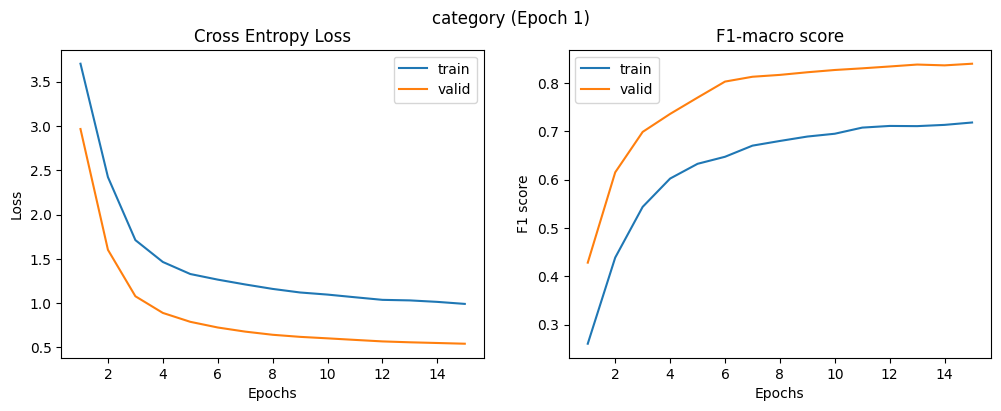

End training MLP classifier "category". Time: 0 days 00:00:43.584549
2024-05-23 07:27:45,985 - clearml.frameworks - INFO - Found existing registered model id=64020902c019430189e57b0f9cae416b [/tmp/experiments/experiment_0/heads/category.pt] reusing it.



Train sub_category classificator. Epochs: 100%|██████████| 15/15 [00:40<00:00,  2.73s/it]


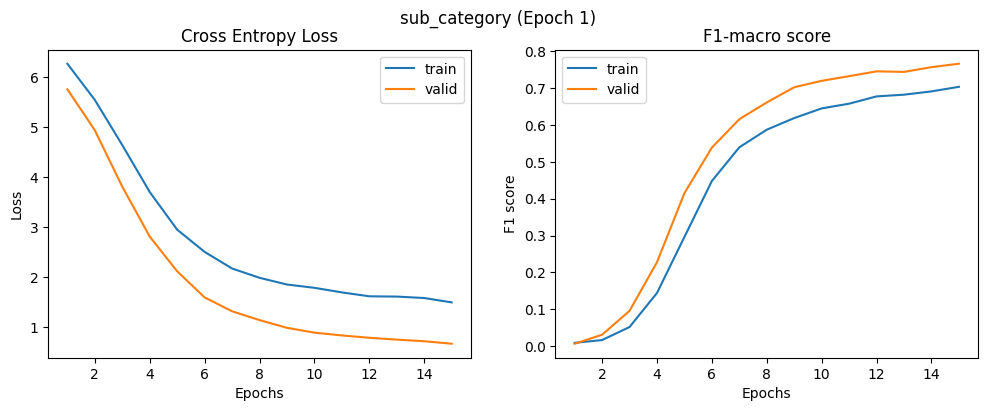

End training MLP classifier "sub_category". Time: 0 days 00:00:40.905474



Train isadult classificator. Epochs: 100%|██████████| 15/15 [00:43<00:00,  2.91s/it]


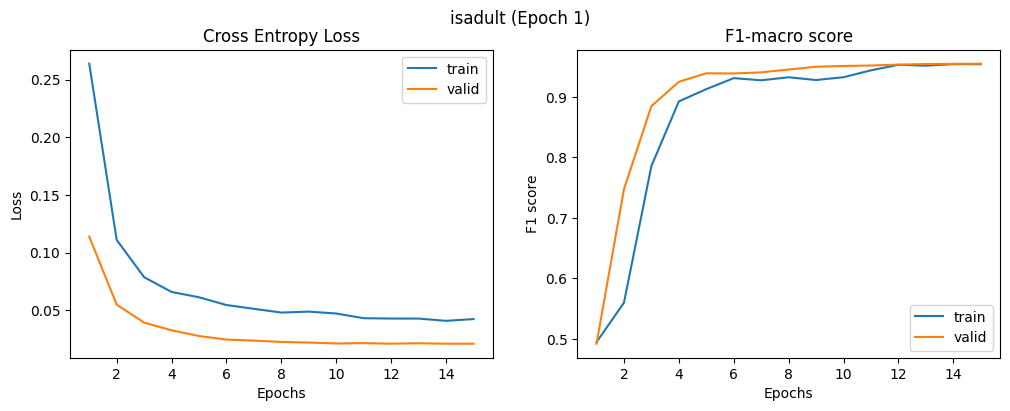

End training MLP classifier "isadult". Time: 0 days 00:00:43.687385
2024-05-23 07:29:19,672 - clearml.frameworks - INFO - Found existing registered model id=e45688732eae4979a939b53ce786c24e [/tmp/experiments/experiment_0/heads/isadult.pt] reusing it.



Train sex classificator. Epochs: 100%|██████████| 15/15 [00:28<00:00,  1.90s/it]


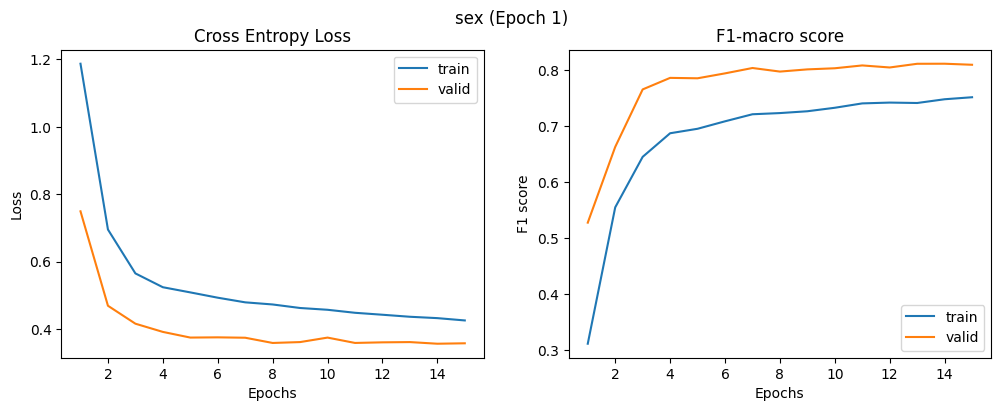

End training MLP classifier "sex". Time: 0 days 00:00:28.515384



Train season classificator. Epochs: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]


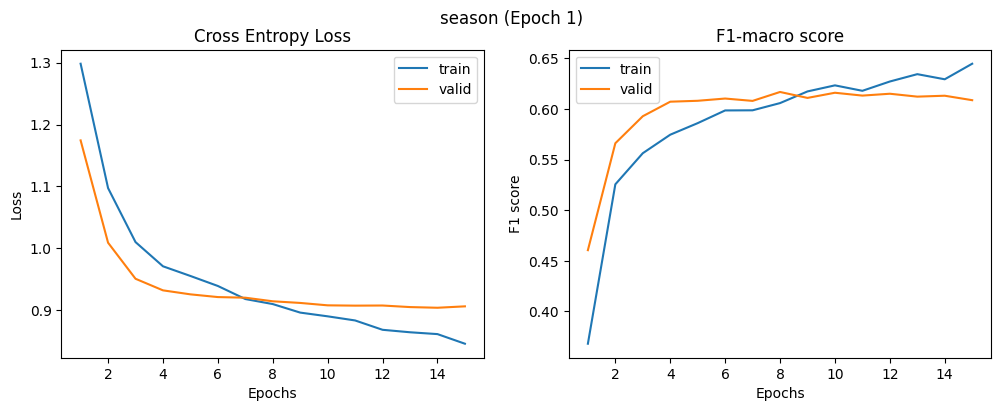

End training MLP classifier "season". Time: 0 days 00:00:11.498693



Train age_restrictions classificator. Epochs: 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]


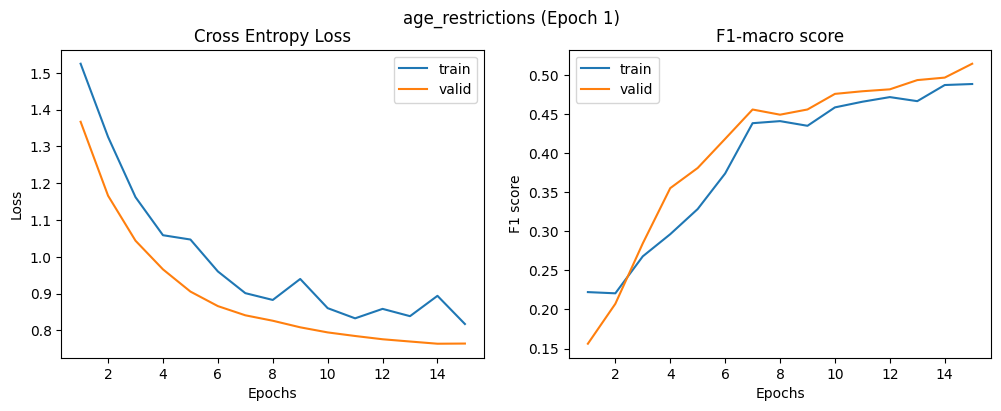

End training MLP classifier "age_restrictions". Time: 0 days 00:00:04.467002



Train fragility classificator. Epochs: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]


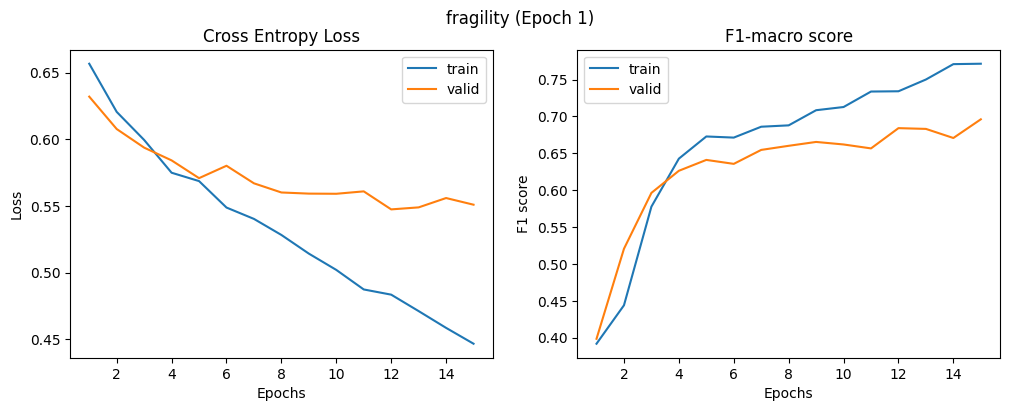

End training MLP classifier "fragility". Time: 0 days 00:00:08.348901
Start clusterization


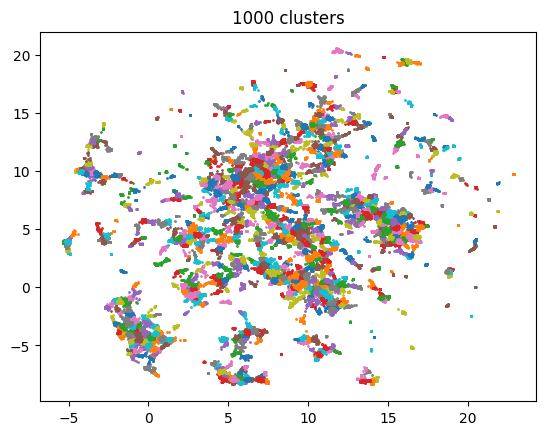

Train ruclip. Epochs:  50%|█████     | 1/2 [2:06:35<2:06:35, 7595.43s/it]

End clusterization. Time: 0 days 00:02:20.752489



Batch: 100%|██████████| 502/502 [1:49:36<00:00, 10.51s/it]
                                                          

Epoch 2. Training time: 0 days 01:49:36.716130
Preparing Data Loaders
Dataset size (0.5 GiB) fits in cache limit (32 GiB). Allocating space to cache all 128313 samples.
Saving a dict for transformation labels to characteristic values
2024-05-23 09:22:34,774 - clearml - INFO - Register artifact, overwriting existing artifact "category"
2024-05-23 09:22:34,777 - clearml - INFO - Register artifact, overwriting existing artifact "sub_category"
2024-05-23 09:22:34,790 - clearml - INFO - Register artifact, overwriting existing artifact "isadult"
2024-05-23 09:22:34,794 - clearml - INFO - Register artifact, overwriting existing artifact "sex"
2024-05-23 09:22:34,797 - clearml - INFO - Register artifact, overwriting existing artifact "season"
2024-05-23 09:22:34,798 - clearml - INFO - Register artifact, overwriting existing artifact "age_restrictions"
2024-05-23 09:22:34,801 - clearml - INFO - Register artifact, overwriting existing artifact "fragility"
Start training MLP classifiers



Train category classificator. Epochs: 100%|██████████| 15/15 [00:45<00:00,  3.01s/it]


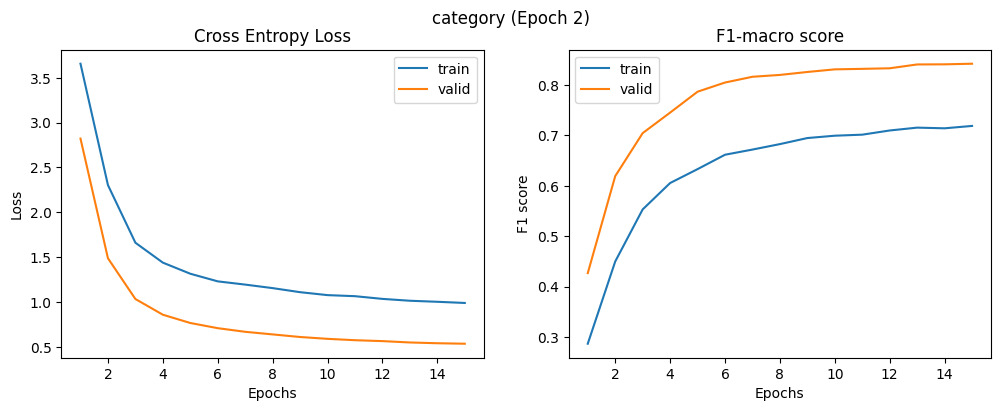

End training MLP classifier "category". Time: 0 days 00:00:45.158428



Train sub_category classificator. Epochs: 100%|██████████| 15/15 [00:41<00:00,  2.79s/it]


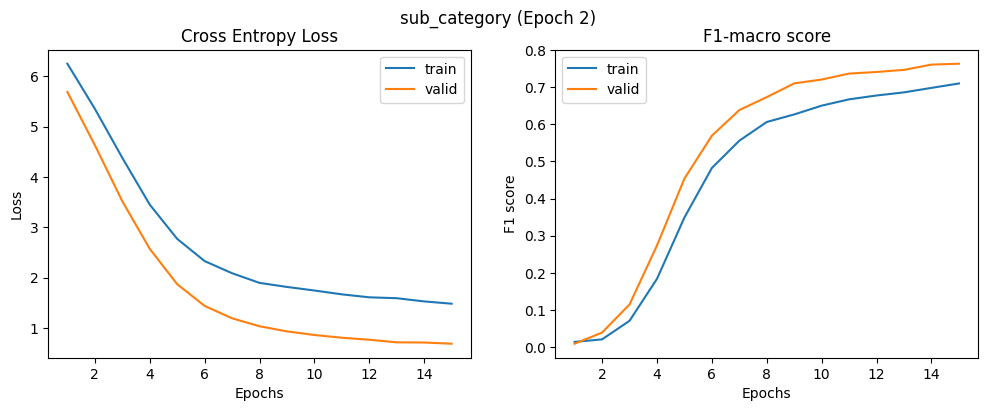

End training MLP classifier "sub_category". Time: 0 days 00:00:41.844044



Train isadult classificator. Epochs: 100%|██████████| 15/15 [00:43<00:00,  2.91s/it]


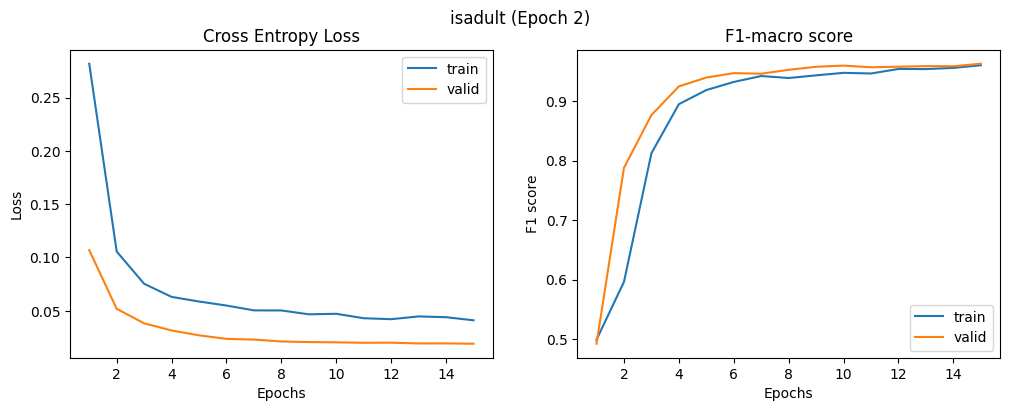

End training MLP classifier "isadult". Time: 0 days 00:00:43.723695



Train sex classificator. Epochs: 100%|██████████| 15/15 [00:27<00:00,  1.83s/it]


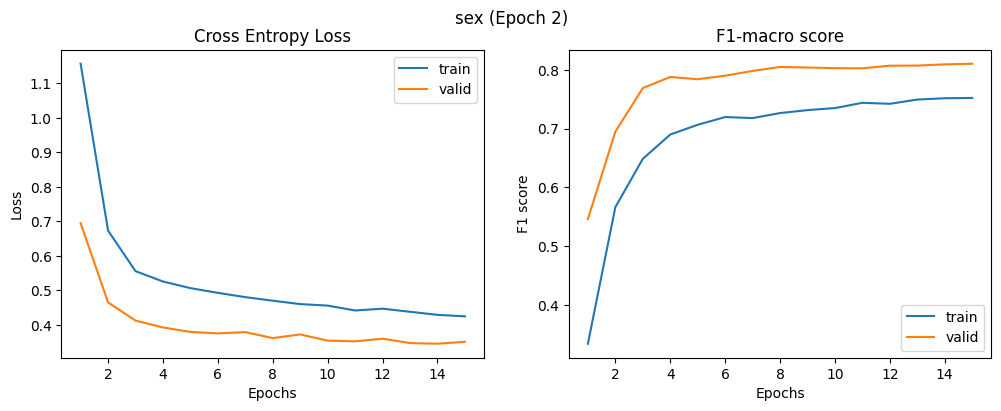

End training MLP classifier "sex". Time: 0 days 00:00:27.492416



Train season classificator. Epochs: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]


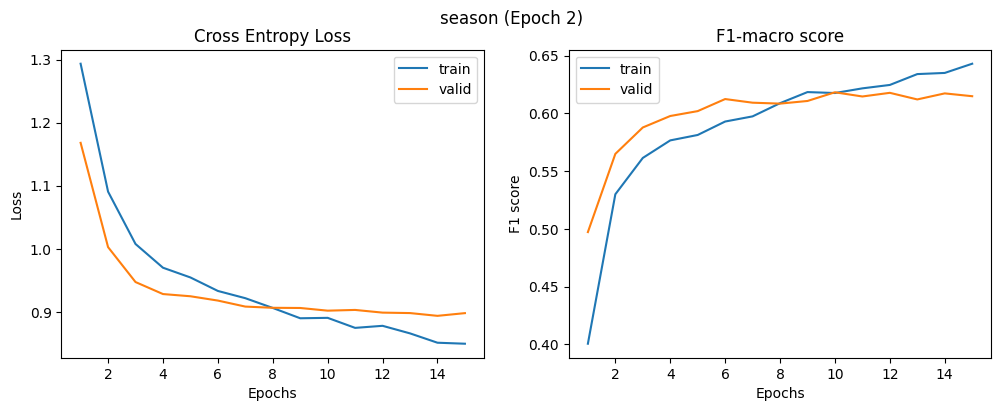

End training MLP classifier "season". Time: 0 days 00:00:11.065720



Train age_restrictions classificator. Epochs: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]


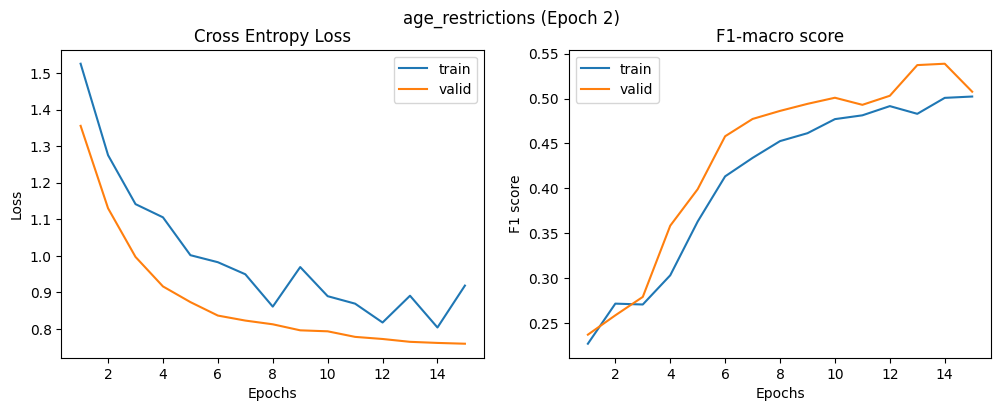

End training MLP classifier "age_restrictions". Time: 0 days 00:00:05.110596



Train fragility classificator. Epochs: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]


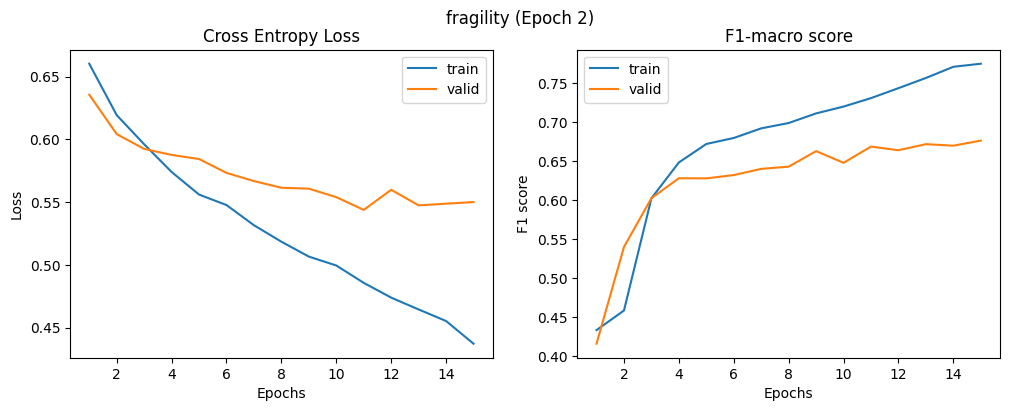

End training MLP classifier "fragility". Time: 0 days 00:00:08.440219
Start clusterization


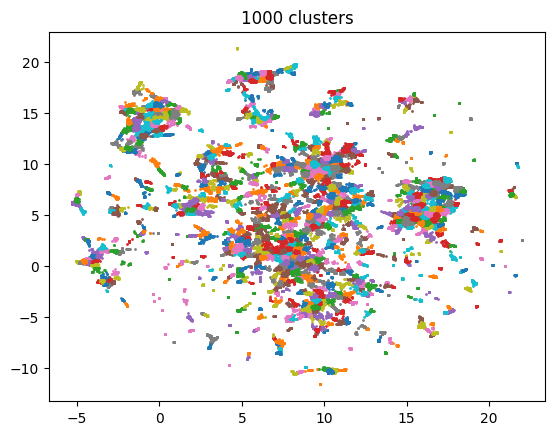

Train ruclip. Epochs: 100%|██████████| 2/2 [4:02:12<00:00, 7266.47s/it]  

End clusterization. Time: 0 days 00:02:15.504276


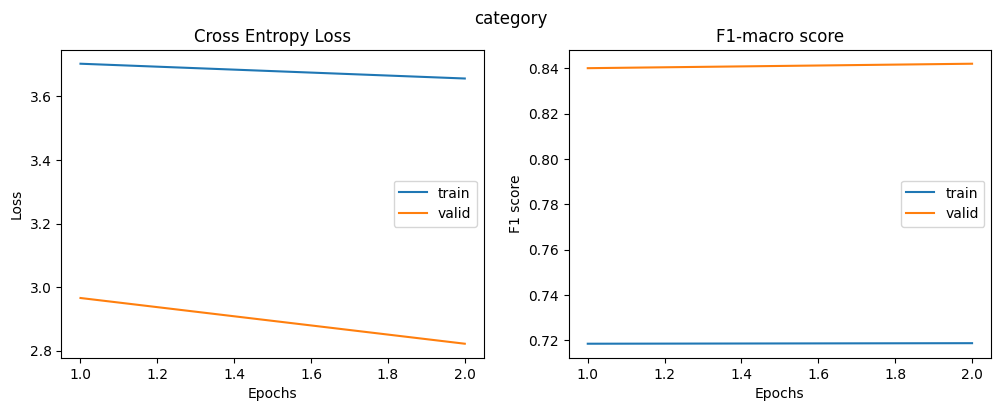

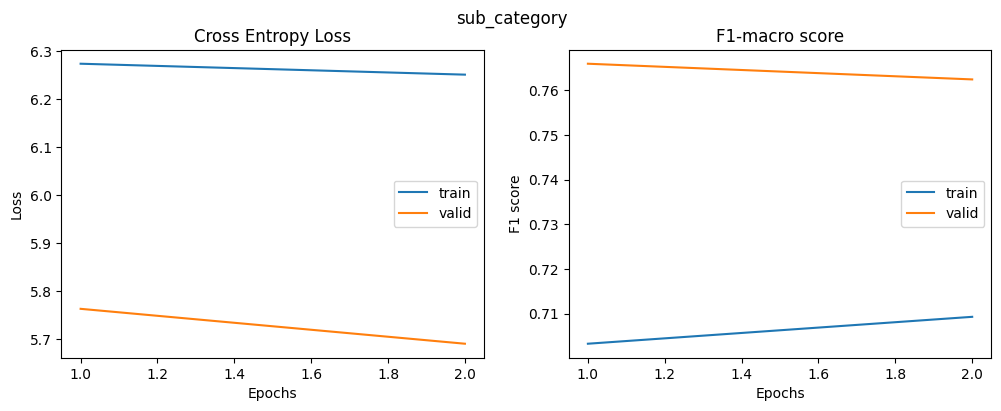

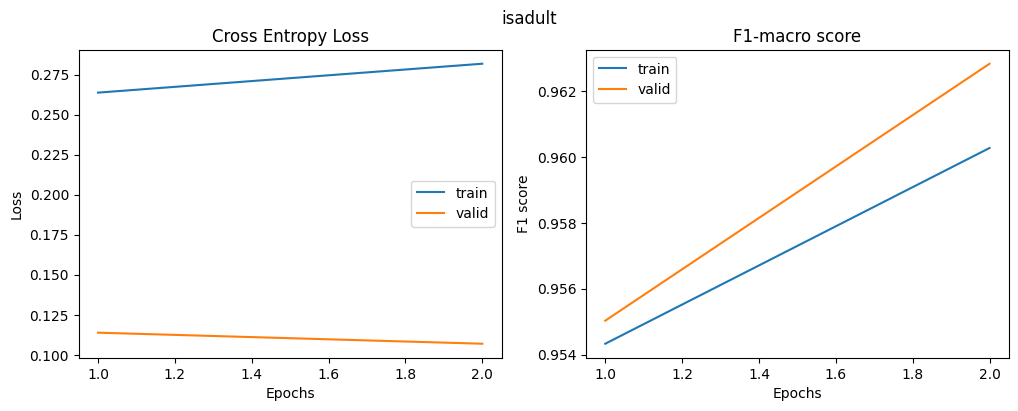

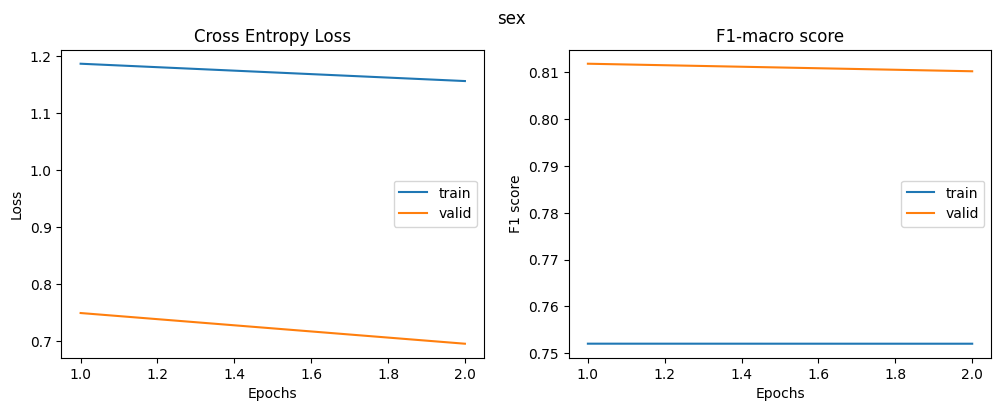

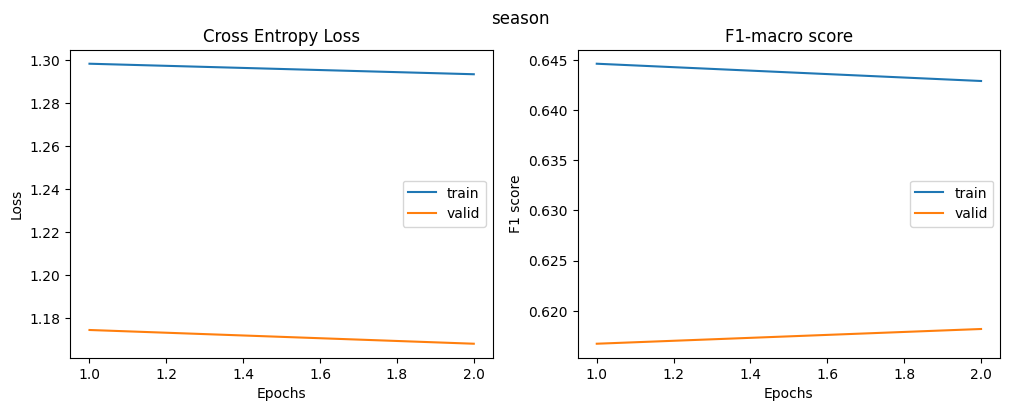

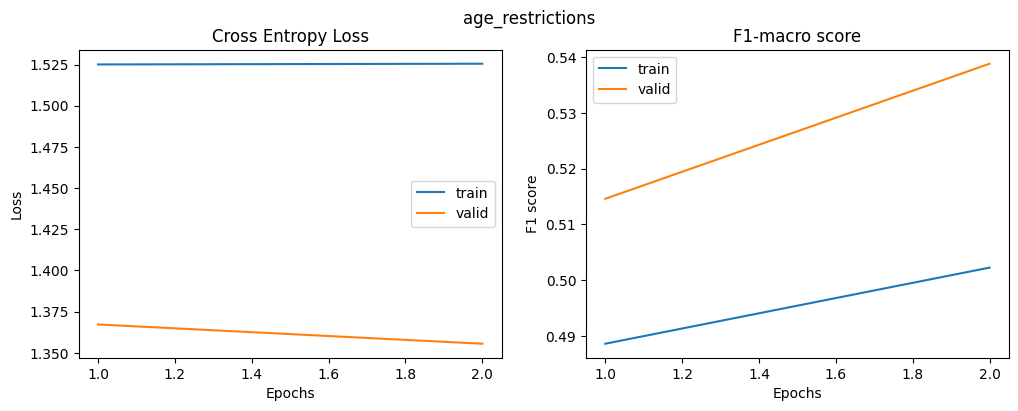

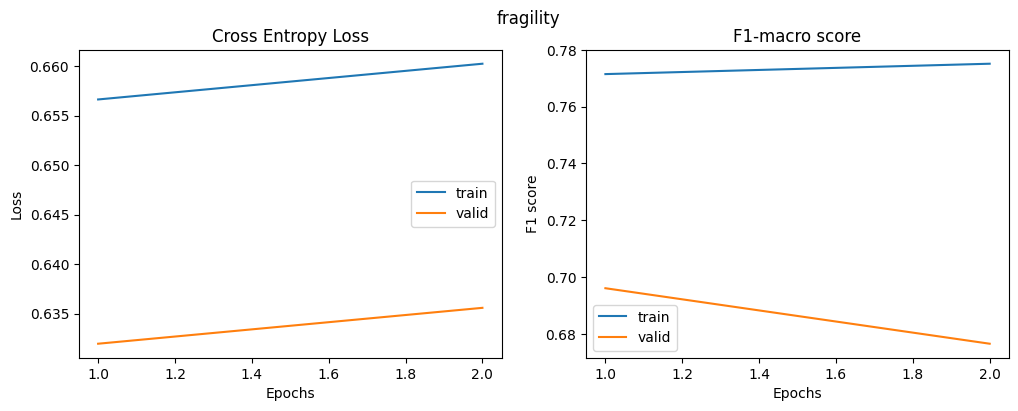

End of experiment
[Prepared data]: shape=(128313, 10), 128313 unique rows, 100.0% uniqueness
	Intersection with [category] 0 rows: 0.0%
	Intersection with [sub_category] 0 rows: 0.0%
	Intersection with [isadult] 0 rows: 0.0%
	Intersection with [sex] 0 rows: 0.0%
	Intersection with [season] 0 rows: 0.0%
	Intersection with [age_restrictions] 0 rows: 0.0%
	Intersection with [fragility] 0 rows: 0.0%
	Intersection with [Clusterization metrics (Epoch 1)] 0 rows: 0.0%
	Intersection with [Clusterization metrics (Epoch 2)] 0 rows: 0.0%
[category]: shape=(63, 2), 63 unique rows, 100.0% uniqueness
	Intersection with [sub_category] 0 rows: 0.0%
	Intersection with [isadult] 0 rows: 0.0%
	Intersection with [sex] 0 rows: 0.0%
	Intersection with [season] 0 rows: 0.0%
	Intersection with [age_restrictions] 0 rows: 0.0%
	Intersection with [fragility] 0 rows: 0.0%
	Intersection with [Clusterization metrics (Epoch 1)] 0 rows: 0.0%
	Intersection with [Clusterization metrics (Epoch 2)] 0 rows: 0.0%
[sub_cate

In [6]:
trainer.train_ruclip(task)